In [74]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
import os
import sklearn

In [75]:
# Import the new data and create a dataframe
daily_flow = pd.read_csv('Data/Daily_Averages/Daily_Mean_Flow_Rate.csv', delimiter=';')
daily_flow.rename(columns={'Value': 'Mean Flow (m3/s)'}, inplace=True)
daily_rain = pd.read_csv('Data/Daily_Averages/Daily_Precipitation.csv', delimiter=';')
daily_rain.rename(columns={'Value': 'Daily Precipitation (mm)'}, inplace=True)
daily_level = pd.read_csv('Data/Daily_Averages/Daily_Mean_Level.csv', delimiter=';')
daily_level.rename(columns={'Value': 'Mean Water Level (m)'}, inplace=True)

# Merge the 3 datasets into one
merged = pd.merge(daily_flow, daily_rain, on=['#Timestamp'])
merged = pd.merge(merged, daily_level, on=['#Timestamp'])
merged = merged.drop('Quality Code_x', axis=1)
merged = merged.drop('Quality Code_y', axis=1)
merged = merged.drop('Quality Code', axis=1)
merged.dropna(inplace=True)

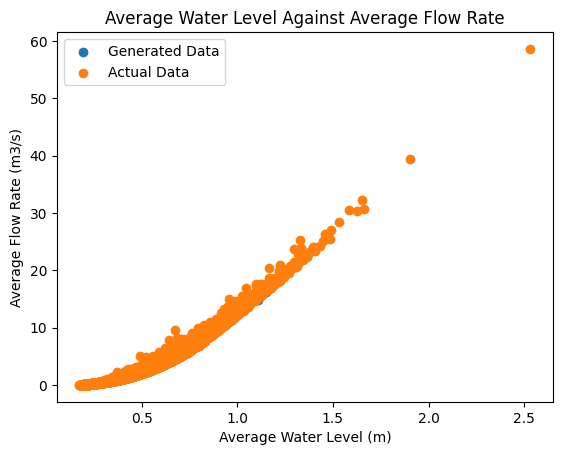

In [76]:
# Read in the Daily_Generated_Data.csv file
df = pd.read_csv('Daily_Generated_Data.csv')
df.head()

# Plot the average water level against the average flow rate
plt.scatter(df['Average Water Level'], df['Average Flow Rate'], label='Generated Data')


# Plot the average water level against the average flow rate for the actual data
plt.scatter(merged['Mean Water Level (m)'], merged['Mean Flow (m3/s)'], label='Actual Data')

plt.legend()
plt.title('Average Water Level Against Average Flow Rate')
plt.xlabel('Average Water Level (m)')
plt.ylabel('Average Flow Rate (m3/s)')
plt.show()

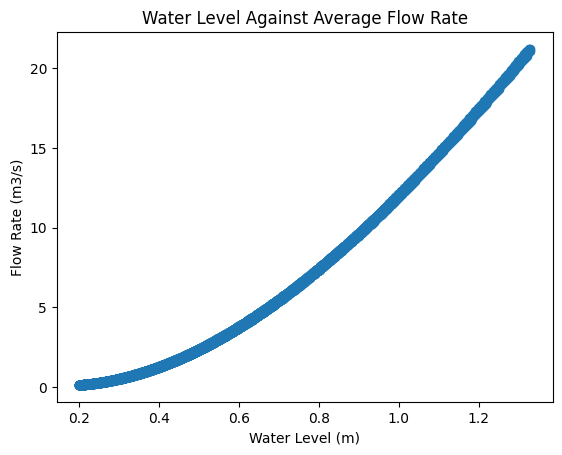

In [77]:
df = pd.read_csv('Quarter_Hourly_Generated_Data.csv')
df.head()

# Plot the average water level against the average flow rate
plt.scatter(df['Water Level'], df['Flow Rate'], label='Generated Data')
plt.title('Water Level Against Average Flow Rate')
plt.xlabel('Water Level (m)')
plt.ylabel('Flow Rate (m3/s)')
plt.show()

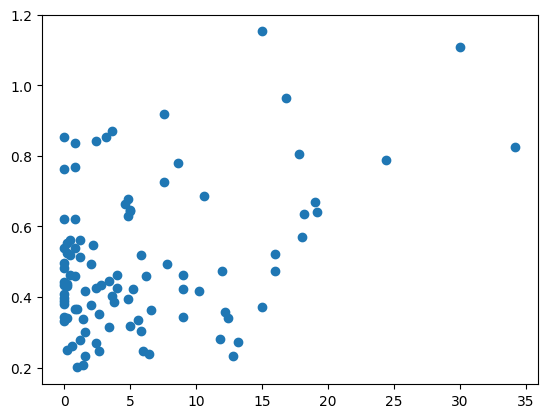

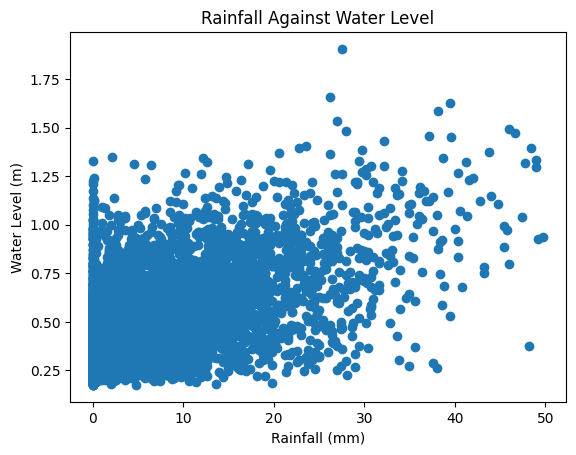

In [78]:
# Plot the generated rainfall against the generated level
df = pd.read_csv('Daily_Generated_Data.csv')
plt.scatter(df['Total Rainfall'], df['Average Water Level'], label='Generated Data')
plt.show()

# Plot the actual rainfall against the actual level
# Remove rainfall of more than 50
merged = merged[merged['Daily Precipitation (mm)'] < 50]

# randomly sample 100 points
#merged = merged.sample(n=100)
plt.scatter(merged['Daily Precipitation (mm)'], merged['Mean Water Level (m)'], label='Actual Data')
plt.title('Rainfall Against Water Level')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Water Level (m)')
plt.show()


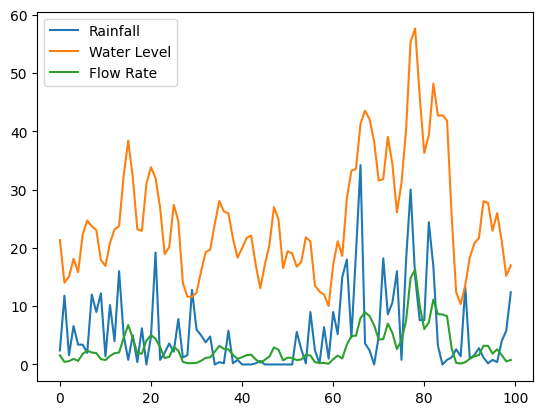

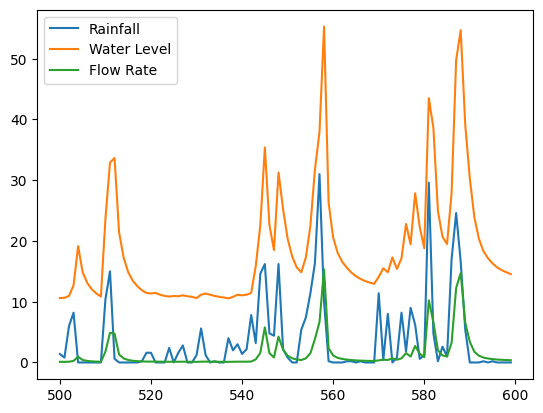

In [80]:
# Plot the generated rainfall, flow, and level against index
df = pd.read_csv('Daily_Generated_Data.csv')
plt.plot(df['Total Rainfall'], label='Rainfall')
plt.plot(df['Average Water Level']*50, label='Water Level')
plt.plot(df['Average Flow Rate'], label='Flow Rate')
plt.legend()
plt.show()

# Do the same for the real data
# Take a sample of 100 consecutive days
merged = merged[500:600]
plt.plot(merged['Daily Precipitation (mm)'], label='Rainfall')
plt.plot(merged['Mean Water Level (m)']*50, label='Water Level')
plt.plot(merged['Mean Flow (m3/s)'], label='Flow Rate')
plt.legend()
plt.show()
